If you use OSMnx in your work, please cite the journal article:

Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

In [1]:
import osmnx as ox
import networkx as nx
import shapely
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

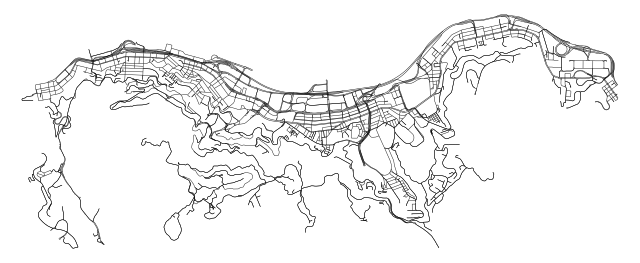

In [2]:
# get HK island road network
G = ox.graph.graph_from_bbox(
    22.296438, 22.258178, 114.222375, 114.124862,
    network_type='drive',
    retain_all=False,
    truncate_by_edge=False,
    simplify=True
)

fig, ax = ox.plot.plot_graph(G, node_size=0, bgcolor='w', edge_color='k', edge_linewidth=.3, save=1, filepath='./map/hk.png', dpi=500)


In [3]:
len(G.edges)

3881

In [4]:
len(G.nodes)

2131

In [5]:
poly_node = pd.read_csv('./map/polygon_verteces.csv')

poly = pd.read_csv('./map/polygon_geometries.csv')

edges = pd.read_csv('./map/edges.csv')
for i in edges.index:
    from_node = edges.loc[i, 'from']
    from_coor = poly_node.loc[poly_node['node']==from_node, ['lon', 'lat']].values.flatten()
    to_node = edges.loc[i, 'to']
    to_coor = poly_node.loc[poly_node['node']==to_node, ['lon', 'lat']].values.flatten()
    
    edges.loc[i, 'distance'] = np.linalg.norm(from_coor - to_coor) * 111

poly_node.head()

,node,lon,lat
0,1,114.124456,22.284502
1,2,114.125668,22.279051
2,3,114.128878,22.274865
3,4,114.133367,22.290534
4,5,114.133350,22.284327


In [6]:
poly_node['Point Geometry'] = ''
for i in poly_node.index:
    poly_node.loc[i, 'Point Geometry'] = shapely.geometry.Point((poly_node.loc[i, 'lon'], poly_node.loc[i, 'lat']))



/opt/anaconda3/envs/geopy37/lib/python3.7/site-packages/pandas/core/internals/managers.py:327: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [7]:
poly['Polygon Geometry'] = ''
for i in poly.index:
    points = [int(j) for j in poly.loc[i, 'geo'].split(',')]
    points_geo = [poly_node.loc[poly_node['node']==j, 'Point Geometry'].values[0] for j in points]

    poly.loc[i, 'Polygon Geometry'] = shapely.geometry.Polygon(points_geo)
    

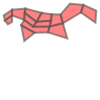

In [8]:
shapely.geometry.MultiPolygon(list(poly['Polygon Geometry'])[:])

In [9]:
poly

,polygon,polygon_name,geo,func,Polygon Geometry
0,1,KT,"1,2,5,4",MR,"POLYGON ((114.124456 22.284502, 114.125668 22...."
1,2,PFL,"2,3,6,5",R,"POLYGON ((114.125668 22.279051, 114.128878 22...."
2,3,SYP,"4,5,9,8,7",MR,"POLYGON ((114.133367 22.290534, 114.13335 22.2..."
3,4,C,"7,8,13,12",B,"POLYGON ((114.147604 22.291782, 114.14687 22.2..."
4,5,WML,"8,9,14,13",MR,"POLYGON ((114.14687 22.287106, 114.146255 22.2..."
5,6,MP,"9,10,15,19,18,14",R,"POLYGON ((114.146255 22.27973, 114.143097 22.2..."
6,7,P,"10,11,15",R,"POLYGON ((114.143097 22.273996, 114.146381 22...."
7,8,WC,"12,13,17,16",B,"POLYGON ((114.164932 22.287256, 114.159476 22...."
8,9,EML,"13,14,18,17",MR,"POLYGON ((114.159476 22.277576, 114.155917 22...."
9,10,CB,"16,17,18,21,20",MR,"POLYGON ((114.175655 22.285659, 114.174873 22...."


In [10]:
tags = {'amenity': ['restaurant']}
poly['num restaurants'] = ''
for i in poly.index:
    print('Fetching No.', i)
    num_rest_i = ox.geometries.geometries_from_polygon(poly.loc[i, 'Polygon Geometry'], tags=tags).shape[0]
    poly.loc[i, 'num restaurants'] = num_rest_i
    

Fetching No. 0
Fetching No. 1
Fetching No. 2
Fetching No. 3
Fetching No. 4
Fetching No. 5
Fetching No. 6
Fetching No. 7
Fetching No. 8
Fetching No. 9
Fetching No. 10
Fetching No. 11
Fetching No. 12


In [11]:
poly['centroid_x'] = ''
poly['centroid_y'] = ''

for i in poly.index:
    poly.loc[i, 'centroid_x'] = poly.loc[i, 'Polygon Geometry'].centroid.x
    poly.loc[i, 'centroid_y'] = poly.loc[i, 'Polygon Geometry'].centroid.y

In [19]:
poly

,polygon,polygon_name,geo,func,Polygon Geometry,num restaurants,centroid_x,centroid_y
0,1,KT,"1,2,5,4",MR,"POLYGON ((114.124456 22.284502, 114.125668 22....",58,114.129194,22.284669
1,2,PFL,"2,3,6,5",R,"POLYGON ((114.125668 22.279051, 114.128878 22....",3,114.130289,22.279226
2,3,SYP,"4,5,9,8,7",MR,"POLYGON ((114.133367 22.290534, 114.13335 22.2...",72,114.140824,22.286555
3,4,C,"7,8,13,12",B,"POLYGON ((114.147604 22.291782, 114.14687 22.2...",186,114.155801,22.285525
4,5,WML,"8,9,14,13",MR,"POLYGON ((114.14687 22.287106, 114.146255 22.2...",55,114.152156,22.2794
5,6,MP,"9,10,15,19,18,14",R,"POLYGON ((114.146255 22.27973, 114.143097 22.2...",2,114.158272,22.271048
6,7,P,"10,11,15",R,"POLYGON ((114.143097 22.273996, 114.146381 22....",0,114.148963,22.26571
7,8,WC,"12,13,17,16",B,"POLYGON ((114.164932 22.287256, 114.159476 22....",27,114.168277,22.282155
8,9,EML,"13,14,18,17",MR,"POLYGON ((114.159476 22.277576, 114.155917 22....",160,114.166207,22.275333
9,10,CB,"16,17,18,21,20",MR,"POLYGON ((114.175655 22.285659, 114.174873 22....",257,114.180275,22.279534


In [13]:
G = nx.Graph()
G.add_nodes_from(poly['polygon'])
G.add_weighted_edges_from(edges.iloc[:, 1:].to_numpy())
pos = dict(zip(poly['polygon'].to_numpy(), poly[['centroid_x', 'centroid_y']].to_numpy()))

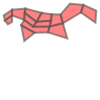

In [14]:
shapely.geometry.MultiPolygon(list(poly['Polygon Geometry'])[:])

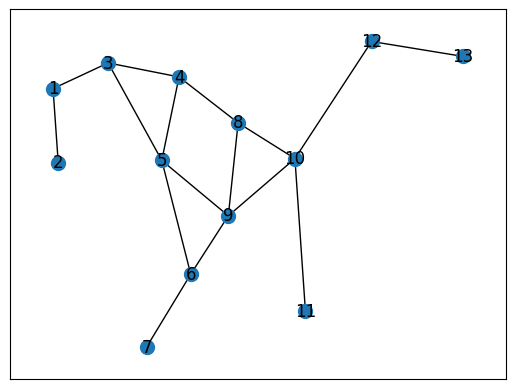

In [16]:
nx.draw_networkx(G, pos=pos, node_size=100)

In [119]:
for i in range(1, 14):
    print(nx.dijkstra_path_length(G, 12, i)*111)

7.4214666356948324
8.041303447077787
6.24452188983209
5.771822819052703
5.082843234958963
5.008796836405416
7.238115732411111
4.349874946781769
3.562218449446391
2.8355988501236227
4.736455312223179
0
1.2334009931304712
